In [ ]:
import pandas as pd
import sqlite3 as sql

In [ ]:
engine = sql.connect('temp1000.db')
cursor= engine.cursor() 

In [ ]:
url = "https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv"
tips = pd.read_csv(url)

In [ ]:
tips.to_sql('tipsDB', con=engine)

In [ ]:
cursor.execute('select * from tipsDB LIMIT 5').fetchall()

In [ ]:
tips.head()

In [ ]:
tips.columns

In [ ]:
cursor.execute('PRAGMA table_info(tipsDB)').fetchall()

In [ ]:
tips.info()

In [ ]:
tips.smoker.map(type)

In [ ]:
sql_select = 'SELECT total_bill, tip, smoker, time\
              FROM tipsDB\
              LIMIT 5'
cursor.execute(sql_select).fetchall()

In [ ]:
tips[['total_bill','tip','smoker','time']].head()

In [ ]:
sql_select = 'SELECT *, tip/total_bill as tip_rate\
                FROM tipsDB\
                LIMIT 5'
cursor.execute(sql_select)
cl_names = []
for x in cursor.description: 
    cl_names.append(x[0])


print(cl_names)
for row in cursor.fetchall():
    print(row)


In [ ]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head(5)

In [ ]:
### WHERE ####3
sql_filter = 'SELECT * FROM tipsDB WHERE time = "Dinner" LIMIT 5'
cursor.execute(sql_filter).fetchall()

In [ ]:
tips[tips['time']=='Dinner'].head()

In [ ]:
sql_select_3 = 'SELECT * FROM tipsDB WHERE time = "Dinner" AND tip > 5.00'
cursor.execute(sql_select_3).fetchall()

In [ ]:
tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)].head()

In [ ]:
sql_update = 'update tipsDB set tip=NULL where tip=7.58'
cursor.execute(sql_update)
engine.commit()

In [ ]:
cursor.execute('select * from tipsDB where total_bill=39.42').fetchall()

In [ ]:
sql_isnull = 'SELECT * FROM tipsDB WHERE tip IS NULL'
cursor.execute(sql_isnull).fetchall()

In [ ]:
#import numpy as np
tips[tips['tip'].isna()]

tips.loc[tips['tip']<3.0,'tip']=None


In [ ]:
tips[tips['tip'].isna()]

In [ ]:
sql_isnotnull = 'SELECT * FROM tipsDB WHERE total_bill IS NOT NULL'
cursor.execute(sql_isnotnull).fetchall()

In [ ]:
tips[tips["total_bill"].notna()]

In [ ]:
### GROUP BY ###
sql_groupby = 'SELECT sex, count(*) FROM tipsDB GROUP BY sex'
cursor.execute(sql_groupby).fetchall()


In [ ]:
tips.groupby('sex').size()

In [ ]:
sql = 'SELECT smoker, day, COUNT(*), AVG(tip) FROM tipsDB GROUP BY smoker, day'
cursor.execute(sql).fetchall()

In [ ]:
tips.groupby(["smoker", "day"]).agg({"tip": ['count', 'mean']})

In [ ]:
db_Airbnb = pd.read_csv('listings-2.csv')

df1 = db_Airbnb[['bedrooms','accommodates','price']]


df2 = df1.assign(price=df1['price'].str.replace('$', ''))
df3 = df2.assign(price=df2['price'].str.replace(',', '').astype(float))

df3.groupby(["bedrooms"]).mean()
df3.groupby(["bedrooms"]).agg({"price":['mean']})

#db_filtered.groupby(["bedrooms"]).agg({"price":['mean']})

In [ ]:
df1["accommodates"].isnull().sum()


In [ ]:
df3[["price","accommodates"]].corr()

In [ ]:
import numpy as np
values = np.random.randn(4)
values = np.append(values,np.nan)

df1 = pd.DataFrame({"key": ["A", "B", "C", "D","E"], "value": values})
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})


df1.to_sql('df1DB', con=engine)
df2.to_sql('df2DB', con=engine)

In [ ]:
sql_join = 'SELECT * FROM df1DB INNER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_join).fetchall()

In [ ]:
pd.merge(df1, df2, on="key")

In [ ]:
sql_leftjoin = 'SELECT * FROM df1DB LEFT OUTER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_leftjoin).fetchall()

In [ ]:
pd.merge(df1, df2, on="key", how="left")

In [ ]:
df3 = pd.DataFrame( 
        {"city": ["Chicago", "San Francisco", "New York City"], "rank": range(1, 4)}
        )

df4 = pd.DataFrame(
        {"city": ["Chicago", "Boston", "Los Angeles"], "rank": [1, 4, 5]})


In [ ]:
df3.to_sql('df3DB', con=engine)
df4.to_sql('df4DB', con=engine)

In [ ]:
sql_union = 'SELECT *\
                FROM df3DB\
                UNION ALL\
             SELECT *\
                FROM df4DB'
cursor.execute(sql_union).fetchall()

<h3> Análise de dados </h3>
<h4> Regressão Linear; Regressão Linear Múltipla; Regressão Polinomial ; Regressão Ridge ; Cross-Validation </h4>

In [3]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('data.csv')
dfClean

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [4]:
#dfClean['Date'].str.match("'[0-9]{4}/[0-9]{2}/[0-9]{2}'")

In [5]:
#### Verifica se tem duplicatas no Dataframe ###3
dfClean[dfClean.duplicated()]

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [6]:
### Remove as duplicatas ####
dfClean.drop_duplicates(inplace=True)
dfClean.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [7]:
### Reset_index #### 
dfClean.reset_index(drop=True,inplace=True)
dfClean.head(50)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [8]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [9]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.2 KB


In [10]:
### Tipos de uma coluna #### 
dfClean.Calories.map(type)

0      <class 'float'>
1      <class 'float'>
2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
            ...       
157    <class 'float'>
158    <class 'float'>
159    <class 'float'>
160    <class 'float'>
161    <class 'float'>
Name: Calories, Length: 162, dtype: object

In [11]:
### Visualiza a coluna Calories #####
dfClean[dfClean.Calories.isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
86,45,107,137,NaN
112,60,105,125,NaN
135,60,97,127,NaN


In [12]:
#### Substituir pela média ##### 
avg_45 = dfClean[dfClean.Duration==45].Calories.mean()
avg_45

277.7870967741935

In [13]:
avg_60 = dfClean[dfClean.Duration==60].Calories.mean()
avg_60

340.2704225352114

In [14]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==60),'Calories'] = avg_60

In [15]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==45),'Calories'] = avg_45

In [16]:
dfClean[dfClean.Calories.isnull()]

,Duration,Pulse,Maxpulse,Calories


In [17]:
## Visualização do DataFrame ###### 
dfClean.Calories.plot

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

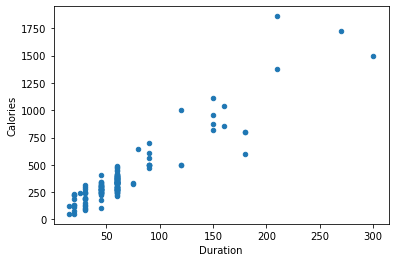

In [18]:
dfClean.plot(kind='scatter', x='Duration', y='Calories')

### Regressão Linear #####

#### Coeficiente de Determinação (R-squared) : 

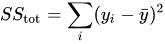
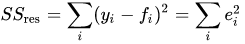
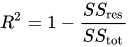

#### Mean squared error :

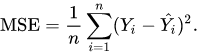

 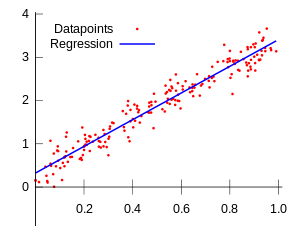

<AxesSubplot:>

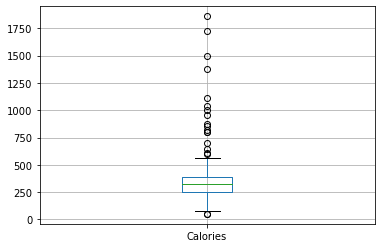

In [19]:
dfClean.boxplot('Calories')

In [20]:
dfClean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435095
std,43.151882,14.711588,16.471618,267.381894
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


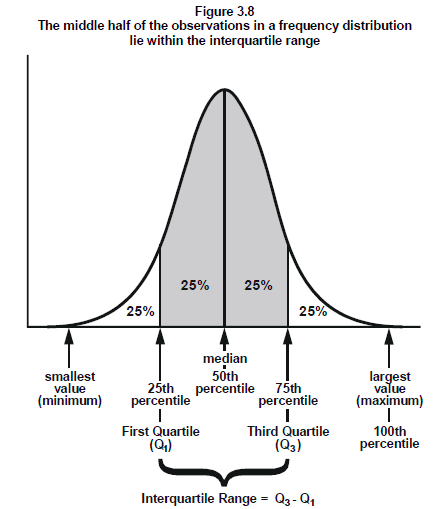

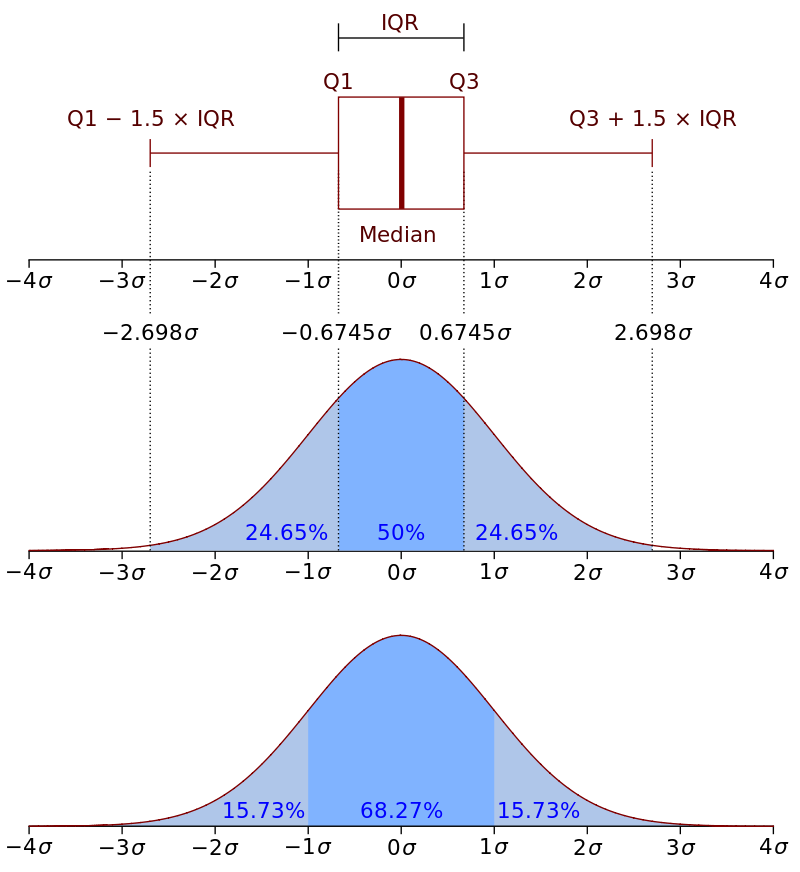


In [21]:
dfClean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019258
Maxpulse,0.003578,0.787035,1.000000,0.197465
Calories,0.923190,0.019258,0.197465,1.000000


In [22]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9231899432094213  with a P-value of P = 2.447193062824461e-68


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

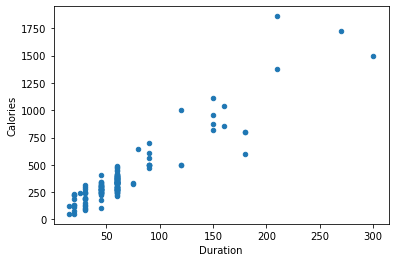

In [23]:
#### Visualizar Duration x Calories 
dfClean.plot(kind='scatter', x='Duration', y='Calories')

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr

LinearRegression()

In [26]:
### Definir as Variáveis X e Y 
X = dfClean[['Duration']]
Y = dfClean[['Calories']]

In [27]:
### Acha a reta que melhor descreve a distribuição dos dados 
lr.fit(X,Y)

LinearRegression()

$$
Yhat = a + b  X
$$

In [28]:
a = lr.intercept_
print(a)

[10.20214808]


In [29]:
b= lr.coef_
print(b)

[[5.72035937]]


In [30]:
### Usa o modelo para predição #### 
Yhat = lr.predict(X)
Yhat[0:5]

array([[353.42371042],
       [353.42371042],
       [353.42371042],
       [267.61831984],
       [267.61831984]])

In [31]:
dfClean.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [32]:
### R-squared #####
print('The R-square is: ', lr.score(X, Y))

The R-square is:  0.8522796712430143


In [33]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  10495.789626824871


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

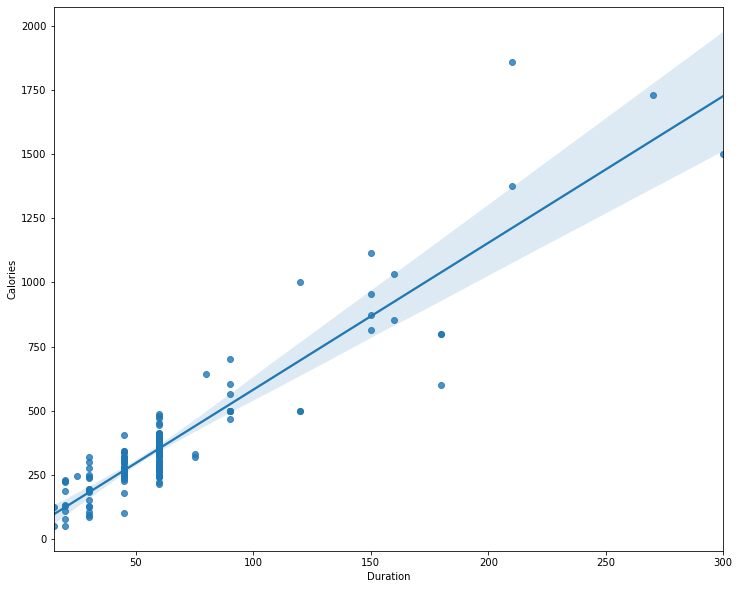

In [35]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=dfClean)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


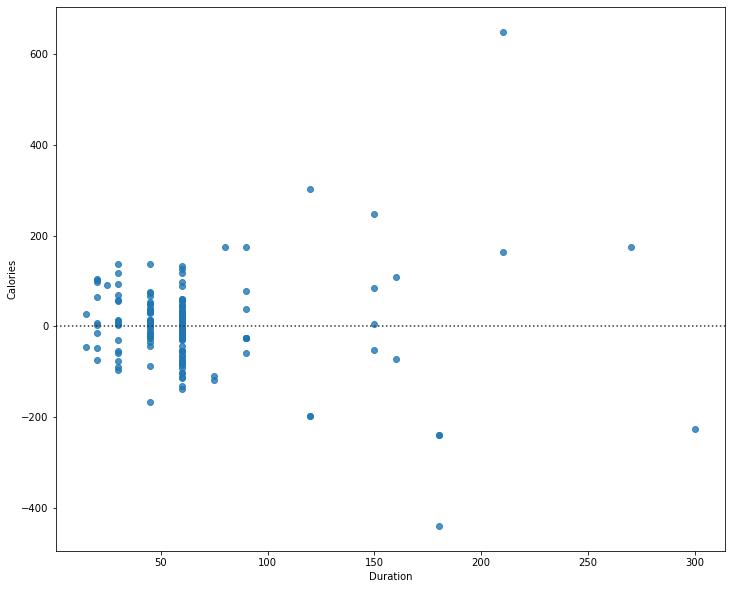

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
x =dfClean['Duration']
y = dfClean['Calories']
sns.residplot(x,y)
plt.show()

<h3>Multiple Linear Regression</h3>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$



$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [37]:
Xm = dfClean[['Duration','Maxpulse','Pulse']]
Y = dfClean[['Calories']]

In [38]:
lr.fit(Xm,Y)

LinearRegression()

In [39]:
Yhat = lr.predict(Xm)

In [40]:
### R-squared #####
print('The R-square is: ', lr.score(Xm, Y))

The R-square is:  0.8907014078940126


In [41]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  7765.857542463226


<h3>Polynomial Regression</h3>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [42]:
Xp = dfClean['Duration']
Y = dfClean['Calories']
Xp

0      60
1      60
2      60
3      45
4      45
       ..
157    60
158    60
159    60
160    75
161    75
Name: Duration, Length: 162, dtype: int64

In [43]:
# Here we use a polynomial of the 3rd order (cubic) 
import numpy as np
f = np.polyfit(Xp, Y, 3)
p = np.poly1d(f)
print(p)

            3           2
-5.437e-05 x + 0.02397 x + 2.946 x + 90.93


In [44]:
np.polyfit(Xp, Y, 3)

array([-5.43695803e-05,  2.39689887e-02,  2.94571546e+00,  9.09250329e+01])

In [45]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 300, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Calories ~ Duration')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Calories')

    plt.show()
    plt.close()

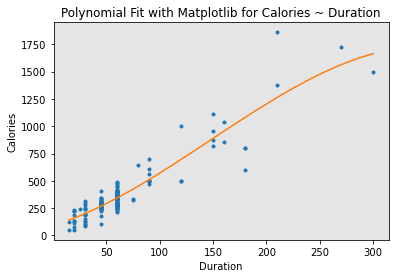

In [46]:
PlotPolly(p, Xp, Y, 'Duration')

In [47]:
from sklearn.metrics import r2_score

In [48]:
r_squared = r2_score(Y, p(Xp))
print('The R-square value is: ', r_squared)

The R-square value is:  0.8565676896712296


In [49]:
mean_squared_error(Y, p(Xp))

10191.118362434876

<h3> Regressão Polinomial usando sklearn library </h3>

In [50]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


In [60]:
X = dfClean[['Duration','Pulse']]
poly = PolynomialFeatures(degree=3)
X_T = poly.fit_transform(X)
X_T

array([[1.000000e+00, 6.000000e+01, 1.100000e+02, ..., 3.960000e+05,
        7.260000e+05, 1.331000e+06],
       [1.000000e+00, 6.000000e+01, 1.170000e+02, ..., 4.212000e+05,
        8.213400e+05, 1.601613e+06],
       [1.000000e+00, 6.000000e+01, 1.030000e+02, ..., 3.708000e+05,
        6.365400e+05, 1.092727e+06],
       ...,
       [1.000000e+00, 6.000000e+01, 1.150000e+02, ..., 4.140000e+05,
        7.935000e+05, 1.520875e+06],
       [1.000000e+00, 7.500000e+01, 1.200000e+02, ..., 6.750000e+05,
        1.080000e+06, 1.728000e+06],
       [1.000000e+00, 7.500000e+01, 1.250000e+02, ..., 7.031250e+05,
        1.171875e+06, 1.953125e+06]])

In [61]:
Y = dfClean[['Calories']]
lr.fit(X_T,Y)

LinearRegression()

In [62]:
Yhat = lr.predict(X_T)
Yhat[0:5]

array([[357.51923287],
       [385.86977795],
       [333.01606293],
       [268.45537074],
       [295.16077152]])

In [63]:
### R-squared #####
print('The R-square is: ', lr.score(X_T, Y))

The R-square is:  0.9077401211940832


In [64]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  6555.226941961897


<h3> Regressão Ridge </h3>

In [71]:
from sklearn.linear_model import Ridge

In [72]:
RigeModel=Ridge(alpha=0.1)

In [73]:
X = dfClean[['Duration','Pulse']]

In [74]:
RigeModel = RigeModel.fit(X, Y)

In [75]:
Yhat = RigeModel.predict(X)
Yhat[0:5]

array([[359.91240509],
       [381.98111776],
       [337.84369243],
       [268.3409611 ],
       [293.562347  ]])

In [76]:
### R-squared #####
print('The R-square is: ', RigeModel.score(X, Y))

The R-square is:  0.8815786092110016


In [77]:
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  8414.048462362129


<h3> Métodos Ridge de regressão - Modelos Polinomiais </h3>
<h4> Introdução do conceito de Pipeline </h4>

In [78]:
from sklearn.pipeline import Pipeline
import numpy as np
#model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
modelPipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),('ridge', Ridge(alpha=0.1))])

In [79]:
X = dfClean[['Duration','Pulse']]
modelPipeline = modelPipeline.fit(X, Y)

In [80]:
Yhat = modelPipeline.predict(X)
Yhat[0:5]

array([[364.94703712],
       [393.70403887],
       [339.20455484],
       [263.4563221 ],
       [287.55074666]])

In [81]:
### R-squared #####
print('The R-square is: ', modelPipeline.score(X, Y))

The R-square is:  0.9037785577120575


In [82]:
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  6836.703007243717


<h3> Definindo conjuntos de Treino e Teste para construção e avaliação de Modelos de Regressão</h3>

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

In [84]:
modelPipeline.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge(alpha=0.1))])

In [85]:
y_pred = modelPipeline.predict(X_test)

In [87]:
### R-squared #####
from sklearn.metrics import r2_score
print('The R-square (test) is: ', r2_score(y_test,y_pred))
print('The R-square (train) is: ', modelPipeline.score(X_train, y_train))

The R-square (test) is:  0.8308511805847555
The R-square (train) is:  0.8886554749122605


<h3> Overfitting, Underfitting </h3>

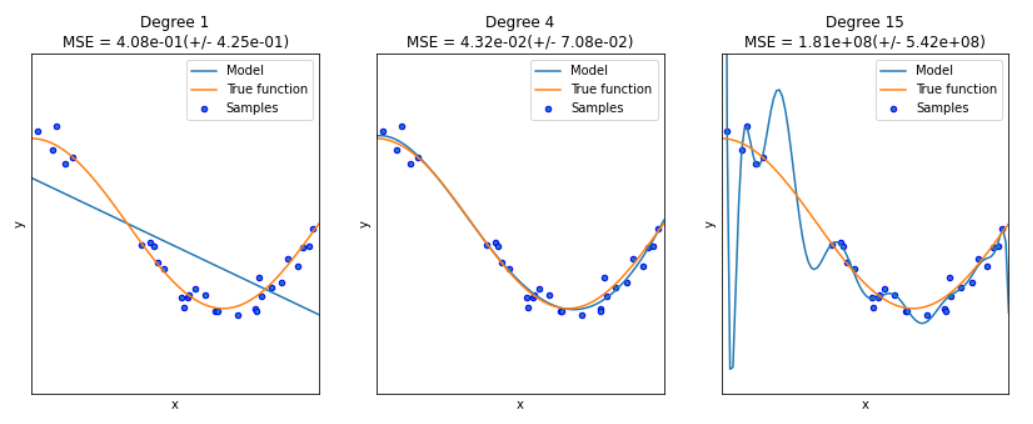


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.69186e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.85168e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


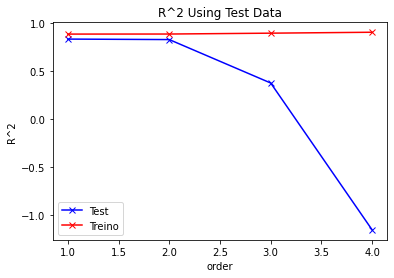

In [88]:
Rsqu_test = []
Rsqu_model =[]

order = [1, 2,3,4]
for n in order:
    #pr = PolynomialFeatures(degree=n)
    
    #x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    #x_test_pr = pr.fit_transform(x_test[['horsepower']])  
    modelPipeline = Pipeline([('poly', PolynomialFeatures(degree=n)),('ridge', Ridge(alpha=0.1))])
    
    modelPipeline.fit(X_train,y_train)
    y_pred = modelPipeline.predict(X_test)
    
    #Rsqu_test.append(r2_score(X_test,y_pred))
    Rsqu_test.append(modelPipeline.score(X_test,y_test))
    Rsqu_model.append(modelPipeline.score(X_train, y_train))

#x_new = np.linspace(15, 300, 100)
#y_new = model(x_new)    
plt.plot(order, Rsqu_test,'b-x')
plt.plot(order, Rsqu_model,'r-x')
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.legend(('Test', 'Treino'))
#plt.text(3, -1.25, 'Maximum R^2 ')    

<h3>  Avaliação de Modelos - Usando Validação-Cruzada </h3>

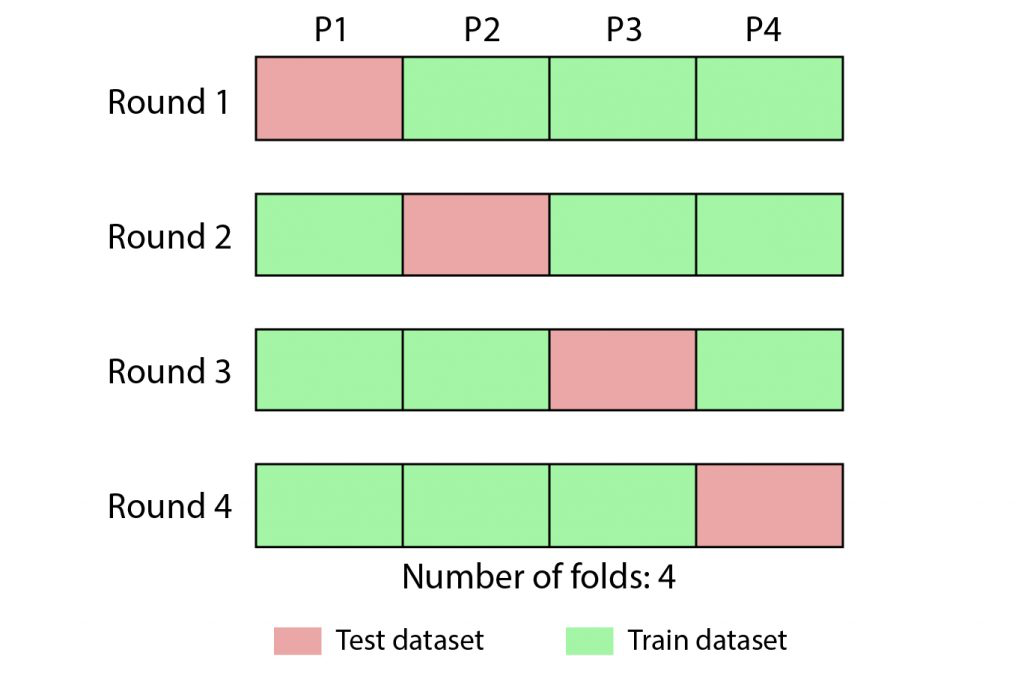

In [89]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lr, X, Y, cv=2)

In [90]:
Rcross

array([0.92143235, 0.79653748])

In [91]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.858984911236841 and the standard deviation is 0.06244743587587076
